# Axisymmetric Multigrid Solver

In axisymmetric coordinates ($r$-$z$), the Poisson equation appears as:

$$\frac{1}{r} \frac{\partial}{\partial r} \left ( r \frac{\partial \phi}{\partial r} \right ) + \frac{\partial^2\phi}{\partial z^2} = f$$

We will solve this with inhomogeneous Dirichlet boundary conditions on $[0, 1]^2$.  With

$$f = 4z^2 + 2 r^2$$

and

\begin{align}
\phi(r=0, z) &= 0 \\
\phi(r=1, z) &= z^2 \\
\phi(r, z=0) &= 0 \\
\phi(r, z=1) &= r^2
\end{align}

the solution is:

$$\phi(r, z) = r^2 z^2$$

## Setting up the solver

We'll take the convention that `x` $\rightarrow$ `r`, and `y` $\rightarrow$ `z` when accessing the grid data.

In [1]:
def f(r, z):
    return 4 * z**2 + 2 * r**2

In [2]:
def rr_func(z):
    return z**2

def zr_func(r):
    return r**2

In [3]:
def true(r, z):
    return r**2 * z**2

In [4]:
import pyro.multigrid.axisymmetric_MG as MG

In [5]:
N = 32

mg = MG.AxisymmetricMG2d(N, N,
                         xl_BC_type="dirichlet", xr_BC_type="dirichlet",
                         yl_BC_type="dirichlet", yr_BC_type="dirichlet",
                         xr_BC=rr_func, yr_BC=zr_func, true_function=true,
                         verbose=1)

cc data: nx = 2, ny = 2, ng = 1
         nvars = 3
         variables:
               v: min:    0.0000000000    max:    0.0000000000
                  BCs: -x: dirichlet    +x: dirichlet    -y: dirichlet    +y: dirichlet   
               f: min:    0.0000000000    max:    0.0000000000
                  BCs: -x: dirichlet    +x: dirichlet    -y: dirichlet    +y: dirichlet   
               r: min:    0.0000000000    max:    0.0000000000
                  BCs: -x: dirichlet    +x: dirichlet    -y: dirichlet    +y: dirichlet   

cc data: nx = 4, ny = 4, ng = 1
         nvars = 3
         variables:
               v: min:    0.0000000000    max:    0.0000000000
                  BCs: -x: dirichlet    +x: dirichlet    -y: dirichlet    +y: dirichlet   
               f: min:    0.0000000000    max:    0.0000000000
                  BCs: -x: dirichlet    +x: dirichlet    -y: dirichlet    +y: dirichlet   
               r: min:    0.0000000000    max:    0.0000000000
                  BCs: -

In [6]:
mg.init_zeros()
mg.init_RHS(f(mg.x2d, mg.y2d))

Source norm =  2.4028431443110723


In [7]:
mg.solve()

source norm =  2.4028431443110723
<<< beginning V-cycle (cycle 1) >>>

  level: 4, grid: 32 x 32
  before G-S, residual L2: 2.4028431443110723
  after G-S, residual L2: 12.949907537944354

  level: 3, grid: 16 x 16
  before G-S, residual L2: 8.851078613176675
  after G-S, residual L2: 2.510200336301418

  level: 2, grid: 8 x 8
  before G-S, residual L2: 1.709803417983295
  after G-S, residual L2: 0.3530965909891356

  level: 1, grid: 4 x 4
  before G-S, residual L2: 0.23964419976745627
  after G-S, residual L2: 0.0015435410120936467

  bottom solve:
  level: 0, grid: 2 x 2

  level: 1, grid: 4 x 4
  before G-S, residual L2: 0.0018088549717517367
  after G-S, residual L2: 1.0026872855338396e-06

  level: 2, grid: 8 x 8
  before G-S, residual L2: 0.7258102075427889
  after G-S, residual L2: 0.007609680921336424

  level: 3, grid: 16 x 16
  before G-S, residual L2: 3.004878183732335
  after G-S, residual L2: 0.03277677801146209

  level: 4, grid: 32 x 32
  before G-S, residual L2: 12.0500

In [8]:
v = mg.get_solution()

In [9]:
import numpy as np
import matplotlib.pyplot as plt

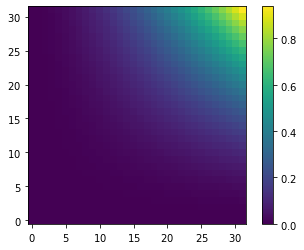

In [10]:
fig, ax = plt.subplots()
im = ax.imshow(np.transpose(v.v()), origin="lower")
fig.colorbar(im, ax=ax)

In [11]:
e = v - true(mg.x2d, mg.y2d)

In [12]:
print(np.abs(e).max())

0.000617617264475653


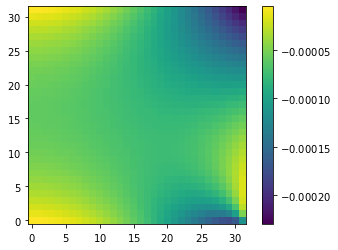

In [13]:
fig, ax = plt.subplots()
im = ax.imshow(np.transpose(e.v()), origin="lower")
fig.colorbar(im, ax=ax)

In [14]:
e.norm()

8.044915834004946e-05

In [15]:
res = mg._compute_residual(mg.nlevels-1)
print(mg.grids[mg.nlevels-1].get_var("r").norm())

2.9832702148195685e-12


In [16]:
for i in range(10):
    mg.smooth(mg.nlevels-1, 100)
    mg.grids[mg.nlevels-1].fill_BC("v")
    mg._compute_residual(mg.nlevels-1)
    print(mg.grids[mg.nlevels-1].get_var("r").norm())

2.1026179561330153e-13
9.578225232788658e-14
7.273262526067396e-14
6.897528548269955e-14
6.897184446661625e-14
6.756122004635183e-14
6.733362509180792e-14
6.86361322648682e-14
6.754540465868575e-14
6.733362509134965e-14


In [17]:
r = mg.grids[mg.nlevels-1].get_var("r")

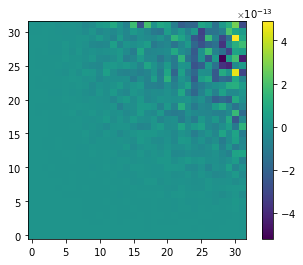

In [18]:
fig, ax = plt.subplots()

im = ax.imshow(np.transpose(r.v()), origin="lower")
fig.colorbar(im, ax=ax)

In [19]:
print(r)

[[ 0.000e+00  0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00  0.000e+00  1.735e-18 ... -4.441e-16  0.000e+00  0.000e+00]
 [ 0.000e+00  1.735e-18 -3.469e-18 ... -8.882e-16 -1.332e-15  0.000e+00]
 ...
 [ 0.000e+00  0.000e+00  6.661e-16 ...  7.461e-14  2.789e-13  0.000e+00]
 [ 0.000e+00  0.000e+00 -1.332e-15 ...  3.464e-14 -2.887e-13  0.000e+00]
 [ 0.000e+00  0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00  0.000e+00]]


## Convergence 

In [22]:
for N in [32, 64, 128, 256]:
    mg = MG.AxisymmetricMG2d(N, N,
                         xl_BC_type="dirichlet", xr_BC_type="dirichlet",
                         yl_BC_type="dirichlet", yr_BC_type="dirichlet",
                         xr_BC=rr_func, yr_BC=zr_func, true_function=true,
                         verbose=0)
    mg.init_zeros()
    mg.init_RHS(f(mg.x2d, mg.y2d))
    mg.solve()
    v = mg.get_solution()
    e = v - true(mg.x2d, mg.y2d)
    print(f"N = {N}, error = {e.norm()}")

N = 32, error = 8.044915834004946e-05
N = 64, error = 2.0120304937333502e-05
N = 128, error = 5.03080680318748e-06
N = 256, error = 1.2577618783599838e-06
